In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

In [2]:
data=pd.read_csv("Downloads/Company_Data.csv")

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [7]:
data.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [6]:
data.tail(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
390,5.47,108,75,9,61,111,Medium,67,12,Yes,Yes
391,6.10,153,63,0,49,124,Bad,56,16,Yes,No
392,4.53,129,42,13,315,130,Bad,34,13,Yes,Yes
393,5.57,109,51,10,26,120,Medium,30,17,No,Yes
394,5.35,130,58,19,366,139,Bad,33,16,Yes,Yes
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [9]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [10]:
data[data.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [11]:
data.duplicated().sum()

0

In [12]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

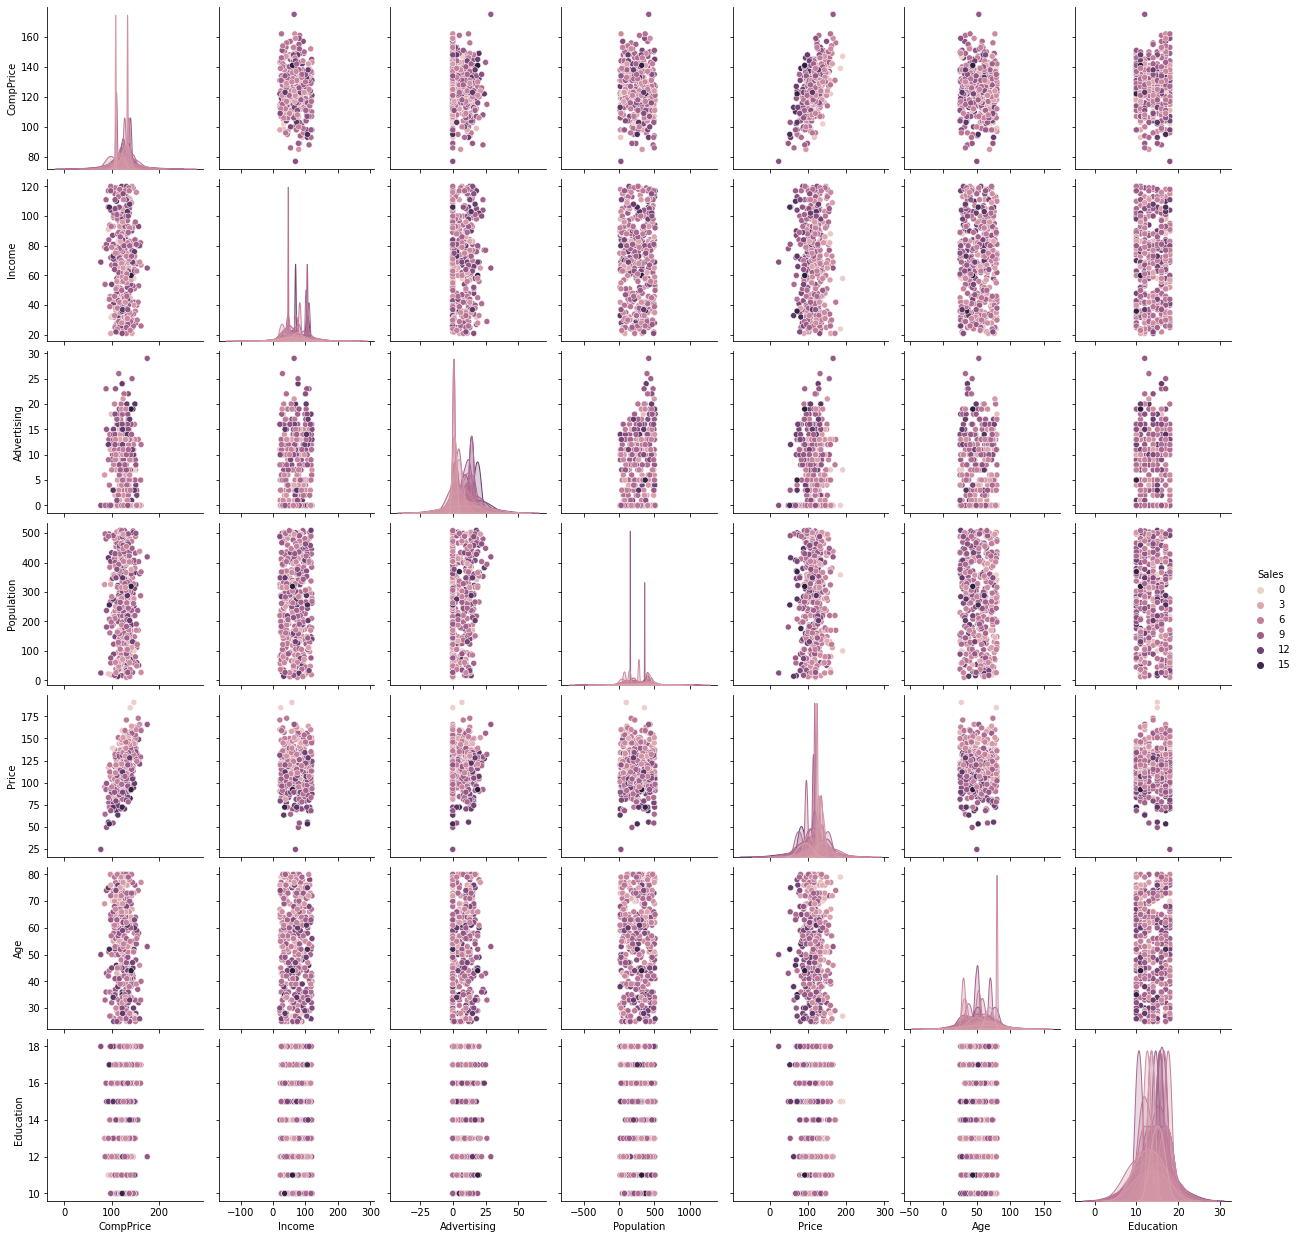

In [14]:
import seaborn as sns
sns.pairplot(data=data,hue="Sales")

In [15]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc']) 

In [16]:
data=pd.get_dummies(data,columns=['Urban','US'],drop_first=True)

In [17]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [18]:
data.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [20]:
data.Sales.min()

0.0

In [21]:
data.Sales.max()

16.27

In [23]:
data.Sales.value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [84]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [24]:
data.Sales.median()

7.49

In [27]:
data.loc[data["Sales"]>=7.5,"sale"]="High"
data.loc[data["Sales"]<7.5,"sale"]="Low"

In [29]:
data.sale.value_counts()

Low     201
High    199
Name: sale, dtype: int64

In [30]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,sale
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Low
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Low
397,7.41,162,26,12,368,159,2,40,18,1,1,Low
398,5.94,100,79,7,284,95,0,50,12,1,1,Low


In [33]:
#Creating dummy variables
data=pd.get_dummies(data,columns=["sale"],drop_first=True)

In [35]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,sale_Low
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,1
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban_Yes    400 non-null    uint8  
 10  US_Yes       400 non-null    uint8  
 11  sale_Low     400 non-null    uint8  
dtypes: float64(1), int32(1), int64(7), uint8(3)
memory usage: 27.9 KB


In [37]:
x=data.iloc[:,1:11]
y=data.iloc[:,11]

In [38]:
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: sale_Low, Length: 400, dtype: uint8

In [39]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes', 'sale_Low'],
      dtype='object')

In [79]:
data.Sales.value_counts() 

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [40]:
#split the data into test data & train data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

# Building Decision Tree Classifier using Entropy Criteria

In [42]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

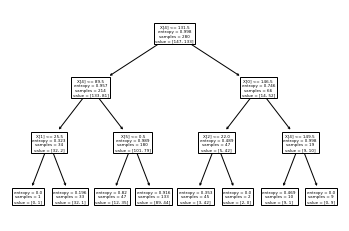

In [43]:
#PLot the decision tree
tree.plot_tree(model);

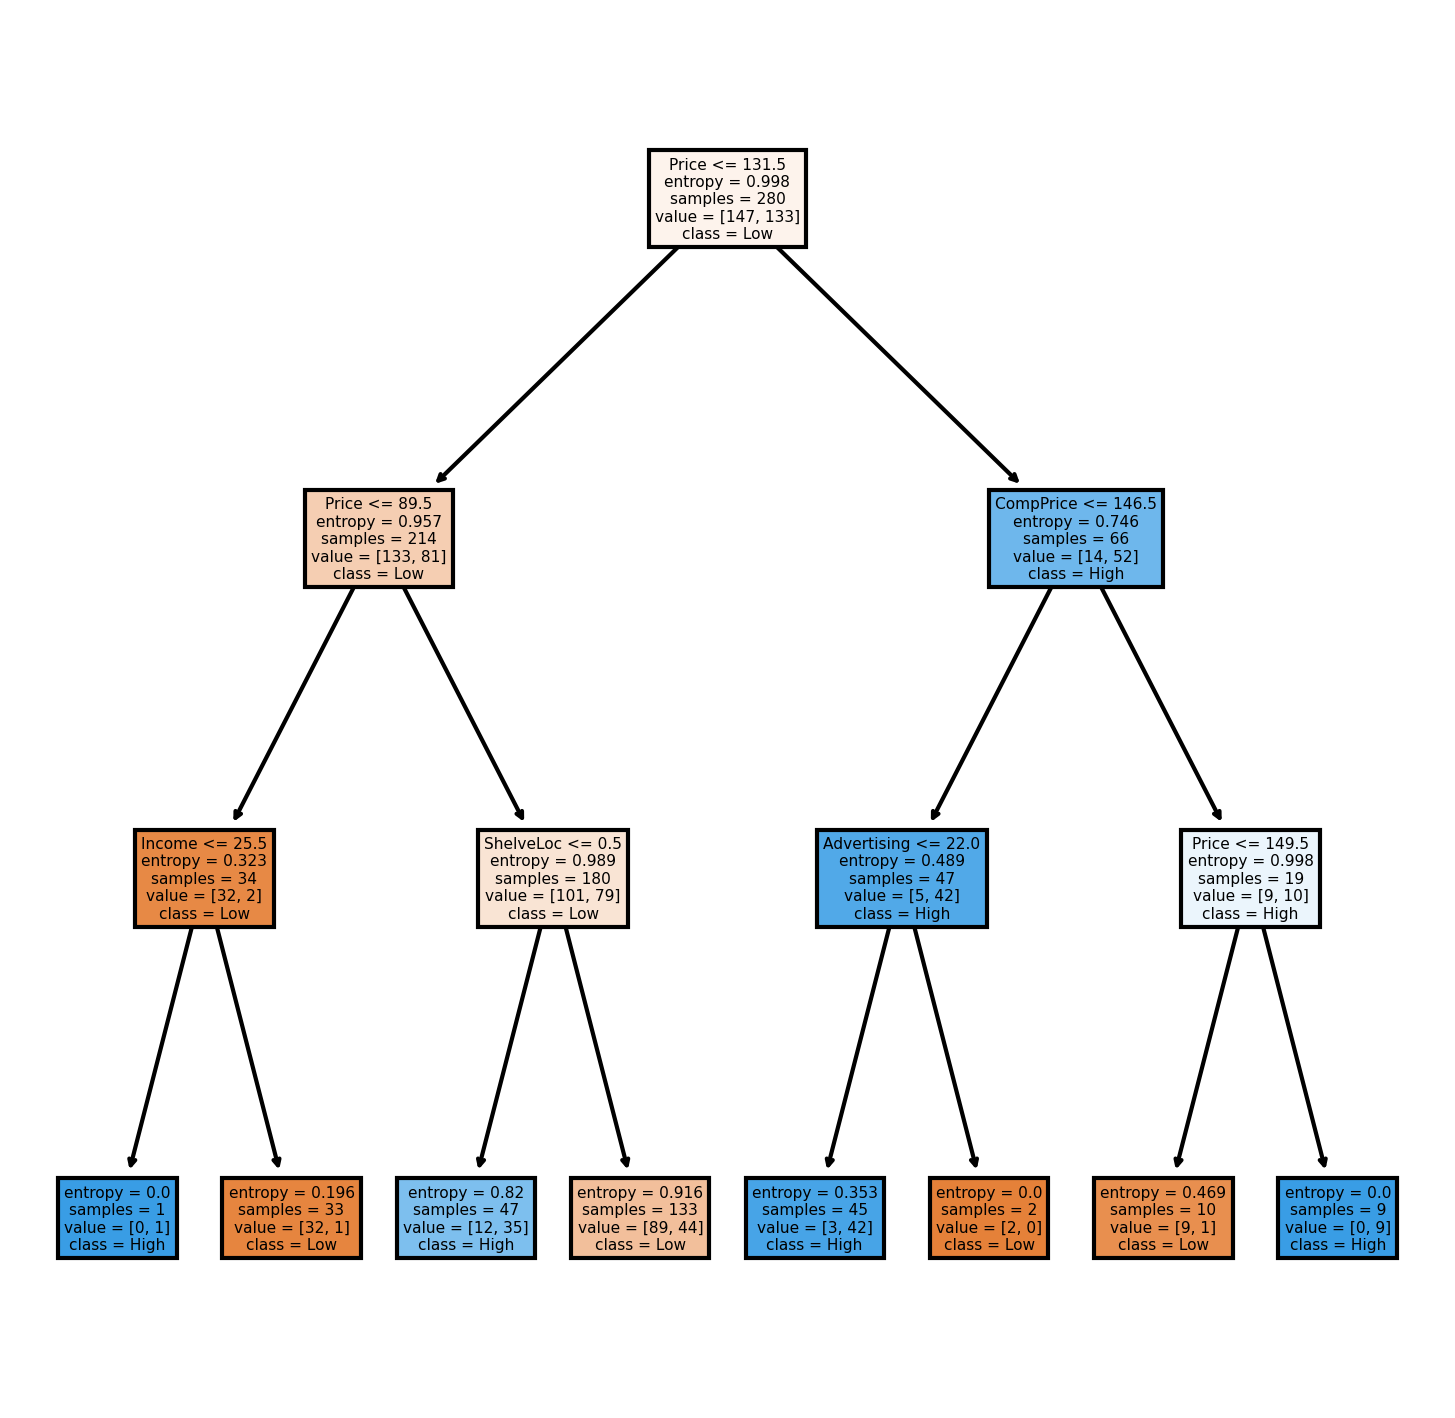

In [44]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urba','US']
cn=['Low','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [45]:
text = tree.export_text(model,max_depth=3)  
print(text) 

|--- feature_4 <= 131.50
|   |--- feature_4 <= 89.50
|   |   |--- feature_1 <= 25.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  25.50
|   |   |   |--- class: 0
|   |--- feature_4 >  89.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_5 >  0.50
|   |   |   |--- class: 0
|--- feature_4 >  131.50
|   |--- feature_0 <= 146.50
|   |   |--- feature_2 <= 22.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  22.00
|   |   |   |--- class: 0
|   |--- feature_0 >  146.50
|   |   |--- feature_4 <= 149.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  149.50
|   |   |   |--- class: 1



In [46]:
model.feature_importances_ 

array([0.07884761, 0.048944  , 0.07682934, 0.        , 0.60283712,
       0.19254193, 0.        , 0.        , 0.        , 0.        ])

In [47]:
import pandas as pd 

feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Price          0.602837
ShelveLoc      0.192542
CompPrice      0.078848
Advertising    0.076829
Income         0.048944
Population     0.000000
Age            0.000000
Education      0.000000
Urba           0.000000
US             0.000000
dtype: float64

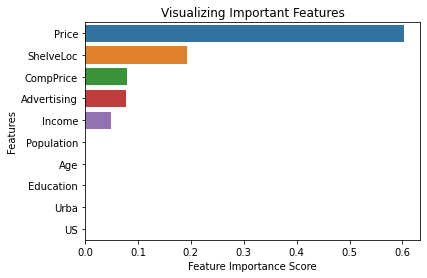

In [49]:
#create a barplot for Visulization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [51]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

0    78
1    42
dtype: int64

In [52]:
preds 

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [53]:
#create Cross tab
pd.crosstab(y_test,preds)

col_0,0,1
sale_Low,,
0,44,8
1,34,34


In [54]:
# Accuracy 
np.mean(preds==y_test)

0.65

# Building Decision Tree Classifier (CART) using Gini Criteria

In [57]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [58]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [59]:
#Prediction and computing the accuracy
pred1=model.predict(x_test)
pred1

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [60]:
np.mean(pred1==y_test) 

0.65

In [61]:
model.feature_importances_ 

array([0.07884761, 0.048944  , 0.07682934, 0.        , 0.60283712,
       0.19254193, 0.        , 0.        , 0.        , 0.        ])

In [62]:
#Decesion Tree Regrasion Example

from sklearn.tree import DecisionTreeRegressor 


In [69]:
data1=data.iloc[:,0:11]
data1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [70]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   ShelveLoc    400 non-null    int32
 6   Age          400 non-null    int64
 7   Education    400 non-null    int64
 8   Urban_Yes    400 non-null    uint8
 9   US_Yes       400 non-null    uint8
dtypes: int32(1), int64(7), uint8(2)
memory usage: 24.3 KB


In [72]:
array=data1.values
X=array[:,0:9]
Y=array[:,9]

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [74]:
model=DecisionTreeClassifier(max_depth=3) 
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [75]:
#find the test Accuracy
model.score(X_test,Y_test)

0.8939393939393939

In [76]:
#find the train Accuracy
model.score(X_train,Y_train)

0.9291044776119403